# Linear Regression From Scratch

Linear Regression is a supervised regression algorithm that supposes the linearity of a function: $${{f}(x)} = {X}{\alpha} + {\beta}$$
$$Dim(X) = {m}\times{n}$$
$$Dim(\alpha) = {n}\times{1}$$
And aims to get the best values of the **coefficient** ${\alpha}$ and the **intercept** ${\beta}$

There are many ways to fit a linear regression model into our data and find the best values for $\alpha$ and $\beta$
* Normal Equation: ${\alpha} = ({X}^{T}{X})^{-1}{X}^{T}{y}$
    * In this formula returns only the **coefficient** ${\alpha}$, so we might append a column of ones into our ${X}$
    * This way is conisered the best as it returns the optimal value of ${\alpha}$ to fit ${x}$ into ${y}$
    * Full derivation may be found here https://medium.com/swlh/understanding-mathematics-behind-normal-equation-in-linear-regression-aa20dc5a0961

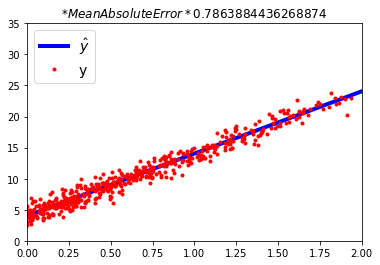

In [1]:
# Let's test the normal equation on a dummy data
import numpy as np
from matplotlib import pyplot as plt
from model.LinearRegression import LinearRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

X =  np.random.randn(1000, 1)
y = 4 + 10 * X + np.random.randn(1000, 1)


normal_linear_regression = LinearRegressor(solver='normal')
normal_linear_regression.fit(X,y)
X_pred = np.array([[0],[2]])
y_pred = normal_linear_regression.predict(X_pred)
error = mae(y, normal_linear_regression.predict(X))

plt.title(f"$*Mean Absolute Error* {error}$")
plt.plot(X_pred, y_pred, "b-", linewidth=4, label="$\hat{y}$")
plt.plot(X, y,'r.', label="y")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 35])
plt.show()

* Another way is using **SVD (Singular Value Decomposition)** that is used for LinearRegression in  sklearn (scikit-learn: a python library for Machine Learning) <br>


The linear function here ignores the bias term $${F}_{\alpha}(x) = {X}{\alpha}$$
$$Dim(X) = {m}\times{n}$$
$$Dim(\alpha) = {n}\times{1}$$

As ${x}$ is a matrix we will use the SVD algorithm, which is briefly a factorization of a real or complex matrix. It generalizes the eigendecomposition of a square normal matrix with an orthonormal eigenbasis to any ${m}\times{n}$ matrix. It is related to the polar decomposition. - *wikipedia*. SVD decomposes the matrix into three other matrices  $${SVD(X)} = {U}_{{m}\times{m}}{\Sigma}_{{m}\times{n}}{{V}^{T}}_{{n}\times{n}}$$ <br>

$\Sigma$ is called singular values and it is a diagnoal matrix (with $({m}\times{n})$ dimension), and it tells you how important the various columns of ${U}$ and ${V}^{T}$ are.

${U}$  is called left singular vectors (with $({m}\times{m})$ dimension) and ${V}^{T}$ is called right singular vectors (with $({n}\times{n})$ dimension) are orthogonal matrices<br>


${U}$ and ${V}^{T}$ are unitary (that means ${U}.{U}^{T} = {{U}^{T}}.{U} = {\Iota}$ (where ${\Iota}\in{R}^{m}$), and ${{V}^{T}}.{V} = {V}.{{V}^{T}} = {\Iota}$ (where ${\Iota}\in{R}^{n}$))<br>

---

${U}$ is a matrix of eigenvectors of ${X}{X}^{T}$ and columns of ${U}$ are named eigen-faces and they are sorted by importance, in other words by their ability to describe the variants in the columns of the matrix ${X}$. They represent information about the column spaces of ${X}$
$${U} = \begin{bmatrix} 
    | & | & | & | &. &. &| \\
    \frac{1}{{\sigma}_{1}} {A}{v1} & \frac{1}{{\sigma}_{2}} {A}{v2} & \frac{1}{{\sigma}_{3}} {A}{v3} & \frac{1}{{\sigma}_{4}} {A}{v4} &. &. &\frac{1}{{\sigma}_{n}} {A}{vn} \\
    | & | & | & | &. &. &|
    \end{bmatrix}_{{m}\times{m}}$$



$\sigma_{i}$, ${i} \in {[1,n]}$ (singular values in $\Sigma$) can be represented as $\sigma_{n} = \sqrt{{\lambda}_{n}}$ where $\lambda_{n}$ is *nth eigenvalue* of ${X}^{T}{X}$

$$\Sigma = \begin{bmatrix}
    {\sigma}_{1} & 0 & 0 & 0 & 0 & 0 &0\\
    0 & {\sigma}_{2} & 0 & 0 & 0 & 0 &0\\
    0 & 0 & {\sigma}_{3} & 0 & 0 & 0 &0 \\
    0 & 0 & 0 & {\sigma}_{4} & 0 & 0 &0 \\
    . & . & . & . & . & . & .\\
    . & . & . & . & . & . & .\\
    0 & 0 & 0 & 0 & 0 & 0 & {\sigma}_{n} \\
    . & . & . & . & . & . & . \\
    . & . & . & . & . & . & .\\
    . & . & . & . & . & . & .\\
    0 & 0 & 0 & 0 & 0 & 0 & 0

    \end{bmatrix}_{{m}\times{n}}$$


$${\sigma}_{1} \geq {\sigma}_{2} \geq {\sigma}_{3} \geq {\sigma}_{4} ... \geq {\sigma}_{n}$$

By deault the eigenvalues here will come from eigenvectors of ${X}^{T}{X}$ that has dimensions ${{n}\times{n}}$ so we aadded zeros to lineup with the multiplication of the matrix to be proper dimensions ${{m}\times{n}}$

${V}$ is a matrix of the eigenvectors of ${X}^{T}{X}$ and rows of ${V}^{T}$ are named eigen-timeseries and they are sorted by importance, in other words by their ability to describe the variants in the rows of the matrix ${X}$. They represent information about the row spaces of ${X}$ 
    $${V}^{T}=\begin{bmatrix}
    - & v1 & - \\
    - & v2 & - \\
    - & v3 & - \\
    - & | & - \\
    - & | & - \\
    - & | & - \\
    - & {v}_{n} & -
    \end{bmatrix}_{{n}\times{n}}$$

* Using SVD with Linear Regression would be like 
    $${X} = {U}{\Sigma}{V}^{T}$$
    $${X}{\alpha} = y$$
    $${U}{\Sigma}{V}^{T}{\alpha} = y$$
    

    To find $\alpha$ we use the *psuedinverse* of X
    $${V}{\Sigma}^{-1}{U}^{T}{U}{\Sigma}{V}^{T}{\alpha} = {V}{\Sigma}^{-1}{U}^{T}y$$
    $$\hat\alpha = {V}{\Sigma}^{-1}{U}^{T}{y}$$
    And as simple as this is, we find the weights $\alpha$ 


Notes:

``I didn't explain the process of finding eigenvectors here, so you can just search Google and you can find many tutorials``

* Other ways depend on the gradient descent, which is an algorithm to find a local minimum of a given function and here we use the *Mean Sqaured Error*
    * &emsp; The Learning Function $F_{\alpha,\beta}(X) = {X}{\alpha}+{\beta}$ 

    * &emsp; First we have to set ential values for $\alpha$ and $\beta$, with *(dimension of $\alpha$)* = *(dimension any row of x)*, and $\beta$ to be a random number or zero $$dim(X) = (m \times n)$$ $$dim(\alpha) = (n \times 1)$$ $$\beta \in \mathbb{R}$$

    * &emsp; Then to define a learning rate (${lr}$) **The larger ${lr}$ the faster to get to the actual optimization but the smaller is the better it's going to be in the end because we are paying attention to the details (will be explained better next)** 

    * &emsp; The loss function is defined as $${L(\alpha,\beta)}=\frac{1}{2m} \sum \limits _{i=1} ^ {m} ({{f}({X}^{(i)})} - {y}^{(i)})^2$$
    $${L(\alpha,\beta)}=\frac{1}{2m} \sum \limits _{i=1} ^ {m} ({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)})^2$$

    * &emsp; After that, for a number of epochs (iterations) or until convergence (**finding a set of inputs that result in the maximum or minimum value from an objective function** in our case to find the **minimum** value) do...

        1. &emsp; To minimize the value $\alpha$ we have to find the partial derivative of the Loss function with respect to it $$\frac{\partial {L(\alpha,\beta)}}{\partial {\alpha}} = \frac{1}{m} \sum \limits _{i=1} ^ {m} ({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)}) {x}^{(i)}$$

        2. &emsp; To minimize the value $\beta$ we have to find the partial derivative of the Loss function with respect to it as well $$\frac{\partial {L(\alpha,\beta)}}{\partial {\beta}} = \frac{1}{m} \sum \limits _{i=1} ^ {m} ({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)})$$

        3. &emsp; Then to subtract the derivatives from the original values $$\alpha = \alpha - {lr} \frac{\partial {L(\alpha,\beta)}}{\partial {\alpha}}$$ $$\beta = \beta - {lr} \frac{\partial {L(\alpha,\beta)}}{\partial {\beta}}$$ 
    * &emsp; In many cases we might add a regularization to our cost function (**techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting**), Machine Learning and Mathmatics enthusiasts usually only regularize the term *$\alpha$*. The most famous regularization functions are: 
        1. &emsp; **The Lasso Regularization** *$$l_{1}(\alpha) = \frac{{\lambda}_{1}}{m}  \sum _{j=1}^{n} {|\alpha^{(j)}|}$$* 
            adding it to the cost function *$L$* may result in changing the derivative of the cost function with repect to *$\alpha$* into $$\frac{\partial {L(\alpha,\beta)}}{\partial {\alpha}} = \frac{1}{m} \sum \limits _{i=1} ^ {m} \biggr[({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)}) {X}^{(i)} + {\lambda}_{1}\sum _{j=1}^{n} sign({\alpha}^{(j)})\biggr]$$
        2. &emsp; **The Ridge Regularization** *$$l_{2}(\alpha) = \frac{{\lambda}_{2}}{m}  \sum _{j=1}^{n} {{\alpha^{(j)}}^{2}}$$* 
            and the derivative would then be $$\frac{\partial {L(\alpha,\beta)}}{\partial {\alpha}} = \frac{1}{m} \sum \limits _{i=1} ^ {m} \biggr[({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)}) {X}^{(i)} + 2{\lambda}_{2}\sum_{j=1}^{n}({\alpha}^{(j)})\biggr]$$
        **NOTE: The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.**
        
        3. &emsp; **The Elastic Net Regularization** is a combination of both *$l1$* and *$l2$* *$$Elastic(\alpha) = \frac{1}{m} \Bigr[{\lambda}_{1}  \sum _{j=1}^{n} {|\alpha^{(j)}|} + {\lambda}_{2}  \sum _{j=1}^{n} {{\alpha^{(j)}}^{2}}\Bigr]$$*
        And adding this term into our cost function will lead into change in the derivative of the cost function with repect to *$\alpha$* into
        $$\frac{\partial {L(\alpha,\beta)}}{\partial {\alpha}} = \frac{1}{m} \sum \limits _{i=1} ^ {m} \Biggr[({X}^{(i)}{\alpha} + {\beta} - {y}^{(i)}) {X}^{(i)} + {\lambda}_{1}\sum _{j=1}^{n} sign({\alpha}^{(j)}) + 2{\lambda}_{2}\sum_{j=1}^{n}({\alpha}^{(j)})\Biggr]$$

        The lambda parameter controls the amount of regularization applied to the model

* The first algorithm that depends on Gradient Descent approach is **Batch Gradient Descent** and here we feed the whole dataset *$X$* to the minimizing step for each epoch 

* The second one is **Mini Batch Gradient Descent** and here we feed small chunks (*S* steps) of the dataset *$X$* to the minimizing step to the end of the dataset *$X$* for each epoch (update gradients after passing through *S* rows of *$X$*)

* The third is **Stochastic Gradient Descent** and here we feed a single row of the dataset *$X$* to the minimizing step to the end of the dataset *$X$* for each epoch (update gradients after passing through every row of the dataset)

In [2]:
# Now let's use a real-world dataset to test how every solver would work
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y =  load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Scale the fetures
attr_scaler = StandardScaler()
X_train = attr_scaler.fit_transform(X_train)
X_test = attr_scaler.transform(X_test)

In [4]:
my_normal_model = LinearRegressor(solver='normal')
my_normal_model.fit(X_train, y_train)
normal_model_y_pred = my_normal_model.predict(X_test)
print(f"{my_normal_model.alias} model MAE ==>", mae(y_test, normal_model_y_pred))

Normal Equation model MAE ==> 45.282227513632115


In [8]:
my_svd_model = LinearRegressor(solver='SVD')
my_svd_model.fit(X_train, y_train)
svd_model_y_pred = my_svd_model.predict(X_test)
print(f"{my_svd_model.alias} model MAE ==>", mae(y_test, svd_model_y_pred))


# Compare it to Sklearn Linear Regression as it uses SVD as well
sklearn_svd_model = LinearRegression()
sklearn_svd_model.fit(X_train, y_train)
sklearn_svd_model_y_pred = sklearn_svd_model.predict(X_test)
print(f"Sklearn Linear Regression model MAE ==>", mae(y_test, sklearn_svd_model_y_pred))

Singular Value Decomposition model MAE ==> 45.28222751363216
Sklearn Linear Regression model MAE ==> 45.28222751363216


In [45]:
# Let's use the Batch Gradient Descent with elastic regulariztion
# The smaller error the best model
batch_model = LinearRegressor(solver='batch', regularization='elastic', lambda_=0.1)
batch_model.fit(X_train, y_train)
batch_model_y_hat = batch_model.predict(X_test)
print(f"{batch_model.alias} model MAE ==>", mae(y_test, batch_model_y_hat))

Fitting a batch gradient descent model into the data...: 100%|██████████| 300/300 [00:00<00:00, 28392.97it/s]

Batch Gradient Descent model MAE ==> 138.61825948873357


In [46]:
# Now let's use the Mini Batch Gradient Descent with l2 regulariztion
mini_batch_model = LinearRegressor(solver='mini_batch', regularization='l2', l2=0.01)
mini_batch_model.fit(X_train, y_train)
mini_batch_model_y_hat = mini_batch_model.predict(X_test)
print(f"{mini_batch_model.alias} model MAE ==>", mae(y_test, mini_batch_model_y_hat))

Fitting a mini-batch gradient descent model into the data...: 100%|██████████| 300/300 [00:00<00:00, 2667.61it/s]

Mini Batch Gradient Descent model MAE ==> 60.452117047496124


In [52]:
# Finally let's test the Stochastic Gradient Descent also with l2 regulariztion
stochastic_batch_model = LinearRegressor(solver='stochastic', regularization='l2', l2=0.1)
stochastic_batch_model.fit(X_train, y_train)
stochastic_batch_model_y_hat = stochastic_batch_model.predict(X_test)
print(f"{stochastic_batch_model.alias} model MAE ==>", mae(y_test, stochastic_batch_model_y_hat))

Fitting a stochastic gradient descent model into the data...: 100%|██████████| 300/300 [00:01<00:00, 186.04it/s]

Stochastic Gradient Descent model MAE ==> 42.605496815739386
